In [20]:
import pandas as pd
import matplotlib.pyplot as plt
demographics = pd.read_csv("../data/raw/kaggle/demographics.csv")

# Character Demographics

In [21]:
demographics.shape

(353, 9)

In [22]:
demographics.head()

,ID,show_title,confirmation_date,character_name,race,gender,orientation,role,representation
0,tt7736544,3Below: Tales of Arcadia,7/12/2019,Shannon Longhannon,White,Cis Woman,Lesbian,Recurring Character,Explicit
1,tt1305826,Adventure Time,5/17/2010,Princess Bubblegum,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
2,tt1305826,Adventure Time,4/5/2010,Marceline the Vampire Queen,NaN,Cis Woman,Undetermined,Recurring Character,Explicit
3,tt1305826,Adventure Time,4/26/2010,BMO,NaN,Agender,Undetermined,Recurring Character,Explicit
4,tt11165358,Adventure Time: Distant Lands,6/25/2020,Y5,NaN,Cis Woman,Ambiguous,Recurring Character,Implicit


As seen above, we have the data of LGBTQIA+ characters across a variety of animated shows. The data provided details their sexual orientation, gender, ethnic origin, role, type of representation (explicit or implicit) and show title. In total, there are 353 reported queer characters.

## Representation by Show

The top 10 shows with most queer characters are:

In [23]:
# divided the original dataframe to get only the top 10 characters, with a corresponding explicit and implicit column
show_rep = demographics.groupby(["show_title", "representation"]).size().unstack()
show_rep["total"] = show_rep["Explicit"].fillna(0) + show_rep["Implicit"].fillna(0)
top_ten = show_rep.nlargest(10, "total").head(10)
top_ten

representation,Explicit,Implicit,total
show_title,,,
She-Ra and the Princesses of Power,13.0,6.0,19.0
South Park,9.0,2.0,11.0
Steven Universe,8.0,3.0,11.0
Craig of the Creek,5.0,4.0,9.0
OK K.O.! Let's Be Heroes,7.0,2.0,9.0
Big Mouth,8.0,NaN,8.0
Q-Force,7.0,1.0,8.0
BoJack Horseman,7.0,NaN,7.0
Family Guy,4.0,3.0,7.0


Plotting the data shows that only a small portion of the reported LGBTQIA+ characters are actually explicit representations:

<Axes: ylabel='queer characters'>

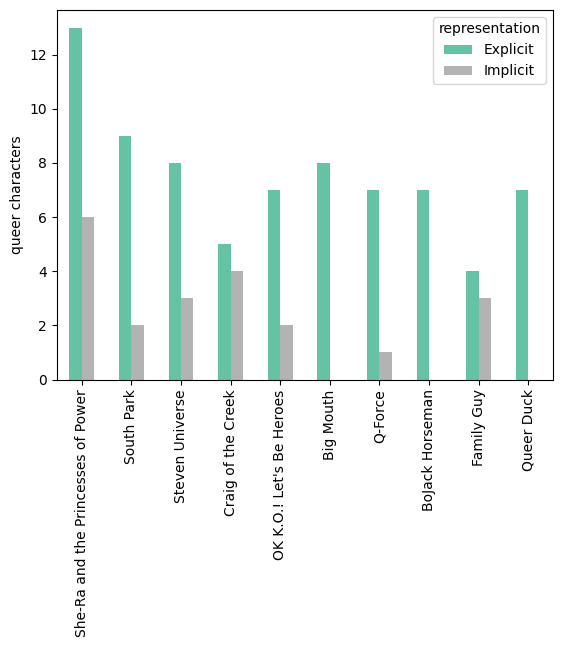

In [24]:
top_ten.drop(["total"], axis=1).plot(kind="bar", cmap="Set2", xlabel="", ylabel="queer characters")

When grouping the shows by most explicit queer characters, we obtain the following rankings:

<Axes: ylabel='queer characters'>

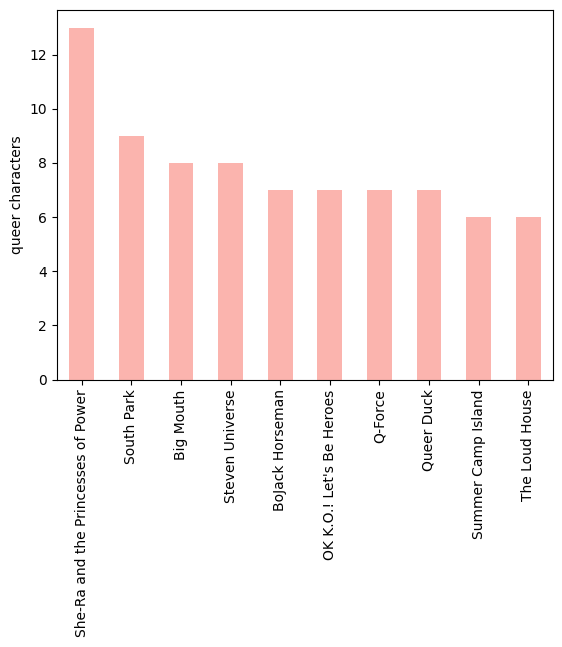

In [25]:
show_rep.nlargest(10, "Explicit").drop(["total", "Implicit"], axis=1).plot(kind="bar", cmap="Pastel1", xlabel="", ylabel="queer characters", legend="")

While She-Ra and South Park remain in the first two positions, Steven Universe descends one place, BoJack Horseman and Big Mouth ascend a couple of places, and Summer Camp Island as well as The Loud House make their way into the graph. 

In [26]:
show_rep.mean()

representation
Explicit    2.778947
Implicit    1.780000
total       2.991525
dtype: float64

In [27]:
show_rep.median()

representation
Explicit    2.0
Implicit    1.0
total       2.0
dtype: float64

It is also worth noting that the top ten shows with explicit queer representations exceed the median of the total and explicit characters by 3 times, while it surpasses the implicit representation median by 6 times. 

(Due to the extreme differences in the data, the median is a more representative measure of central tendency).

## Type of Representation

Amongst the 353 characters, 264 of them are implicit queer representations, while 89 of them are explicit.

<Axes: title={'center': 'Type of Representation by Year'}, xlabel='year', ylabel='queer characters'>

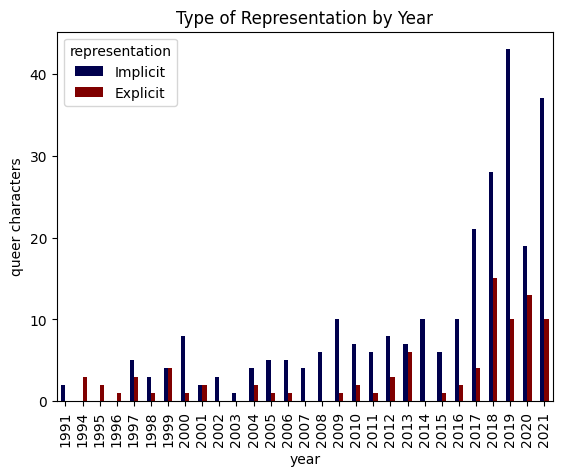

In [28]:
# creating a year column
demographics['confirmation_date'] = pd.to_datetime(demographics['confirmation_date'])
demographics["year"] = demographics["confirmation_date"].dt.year

# analyzing the type of representation by year 
a = demographics.groupby(["year", "representation"]).size().unstack().rename(columns={'Explicit': 'Implicit', 'Implicit': 'Explicit'}) 
a.plot(kind="bar", title="Type of Representation by Year", ylabel="queer characters", cmap="seismic")

As the years go by, not only the LGBTQIA+ representation grows, but the representation also starts getting more explicit. While it started mainly with implicit queer characters, explicit representation begins growing steadily by the 2010s, with some rough patches.

However, as the representation goes up, so do the implicit LGBTQIA+ characters. The only year with the shortest gap between explicit and implicit representation was 2020, which is not much considering that queer representation decreased all across the board during the pandemic. 

The increase in LGBTQIA+ representation at the cost of greater queer subtext is an undesirable outcome, considering it censors and obscures diversity. Progression should come not only in greater numbers, but also in greater visibility and clarity.

## Gender, Orientation, and Race

### Orientation

<Axes: title={'center': 'Characters by Sexual/Romantic Orientation'}, xlabel='Characters'>

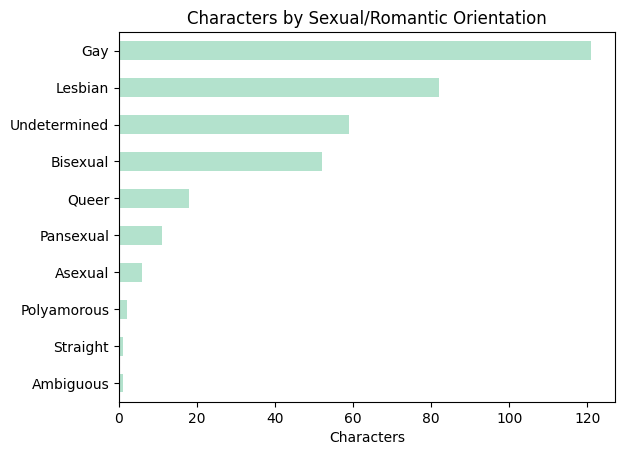

In [30]:
demographics["orientation"].value_counts().sort_values(ascending=True).plot(kind="barh", title="Characters by Sexual/Romantic Orientation", ylabel="", xlabel="Characters", colormap="Pastel2")

Most of the characters represented in animated shows belong to the gay and lesbian groups. Following them is a sizable group of undetermined sexualities.

The least represented groups in the LGBTQIA+ spectrum are the polyamorous, asexual and pansexual orientations. 

In [31]:
demographics[demographics["orientation"].str.contains("Undetermined")].head(10)

,ID,show_title,confirmation_date,character_name,race,gender,orientation,role,representation,year
1,tt1305826,Adventure Time,2010-05-17,Princess Bubblegum,NaN,Cis Woman,Undetermined,Recurring Character,Explicit,2010
2,tt1305826,Adventure Time,2010-04-05,Marceline the Vampire Queen,NaN,Cis Woman,Undetermined,Recurring Character,Explicit,2010
3,tt1305826,Adventure Time,2010-04-26,BMO,NaN,Agender,Undetermined,Recurring Character,Explicit,2010
31,tt1561755,Bob's Burgers,2011-03-06,Marbles,White,Trans Woman,Undetermined,Guest Character,Explicit,2011
32,tt1561755,Bob's Burgers,2011-03-06,Marshmallow,POC,Trans Woman,Undetermined,Recurring Character,Explicit,2011
54,tt10380896,City of Ghosts,2021-03-05,Thomas,POC,Non Binary,Undetermined,Main Character,Explicit,2021
56,tt3061050,Clarence,2014-12-04,Sue Randell,White,Cis Woman,Undetermined,Recurring Character,Explicit,2014
57,tt3061050,Clarence,2014-12-04,EJ Randell,White,Cis Woman,Undetermined,Recurring Character,Explicit,2014
68,tt5120600,Danger & Eggs,2017-06-30,Milo,POC,Non Binary,Undetermined,Guest Character,Explicit,2017
69,tt5120600,Danger & Eggs,2017-06-30,The Mayor,POC,Trans Woman,Undetermined,Recurring Character,Implicit,2017


Exploring the characters with undetermined sexualities allows us to shed more light on the categorization methods of the dataset. While Princess Bubblegum and Marceline fall into the sapphic spectrum (that is, women loving women), they are labeled as "Undetermined" because their sexuality may have not been confirmed textually in the show. 

Thus, although at first hand the undetermined sexualities may seem like a censorship or invisibility issue, it’s rather a mattter of how they were labeled by the creators of the dataset. This is further supported by the fact that many of these characters fall into the explicit representation category. 

Ultimately, a label is not required to communicate a queer story, and the type of representation is far more important. However, this shows an undersight in the categorization of the data, as a character’s sexuality can be described in other global labels.

### Gender

<Axes: title={'center': 'Gender Identities on the Trans Spectrum'}>

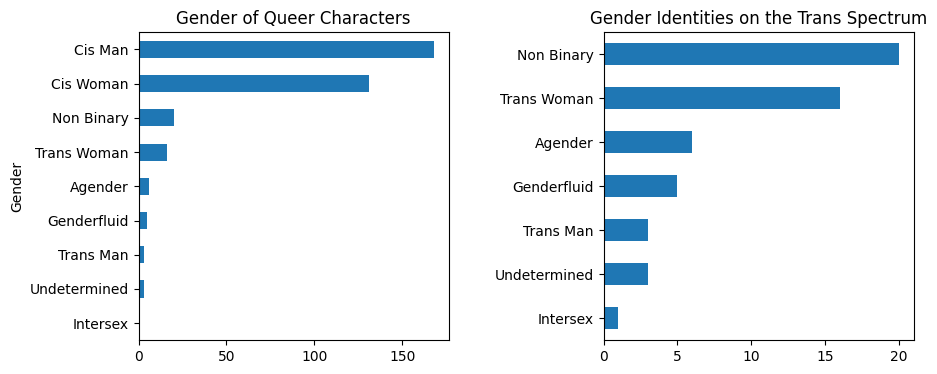

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.subplots_adjust(wspace=0.5)
demographics["gender"].value_counts().sort_values(ascending=True).plot(kind="barh", ax=axes[0], title="Gender of Queer Characters", ylabel="Gender")
demographics["gender"].value_counts().sort_values(ascending=True).drop(["Cis Man", "Cis Woman"]).plot(kind="barh", ax=axes[1], title="Gender Identities on the Trans Spectrum", ylabel="")

An analysis by gender reveals a substantial gap in the sexual and romantic orientations vs the gender diversity of animated characters. While lesbian and gay sexualities surpass 80 characters each, the top 2 trans identities barely have more than 15 characters. 

Non-binary and trans women are the most represented groups within the trans spectrum. Meanwhile, intersex, undetermined and trans men are the least represented. 

It’s interesting to note that trans men, an identity aligned with the gender binary, is less represented than genderfluid, agender and non-binary folks; who defy the established gender structure.

### Race

<Axes: title={'center': 'Ethnicity of Queer Characters'}>

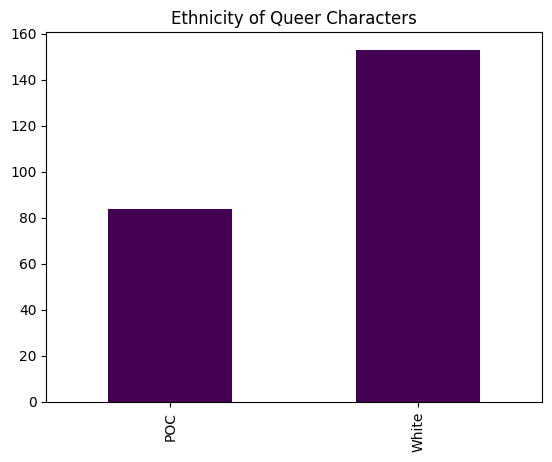

In [33]:
demographics["race"].value_counts().sort_values(ascending=True).plot(kind="bar", title="Ethnicity of Queer Characters", xlabel="", ylabel="", colormap="viridis")

In [34]:
demographics["race"].value_counts().to_frame()

,count
race,
White,153
POC,84


A sustantial amount of queer characters are white (153) while people of colour (POC) amount to 84 characters.

## Character Roles

In [35]:
demographics["role"].value_counts().sort_values(ascending=False).to_frame()

,count
role,
Recurring Character,175
Main Character,95
Supporting Character,44
Guest Character,39


Mostly of the LGBTQIA+ characters reported in this dataset are recurring characters (175, almost half of them) while only 95 characters are protagonists. 